In [316]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [317]:
# LOAD DATA

df = pd.read_csv('ecommerce shipping data.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [318]:
df.shape 

(10999, 12)

In [319]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [321]:
# CHECK DUPLICATE VALUE

df.duplicated().sum()

0

In [322]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [323]:
# DROP UNWATED COLUMN

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


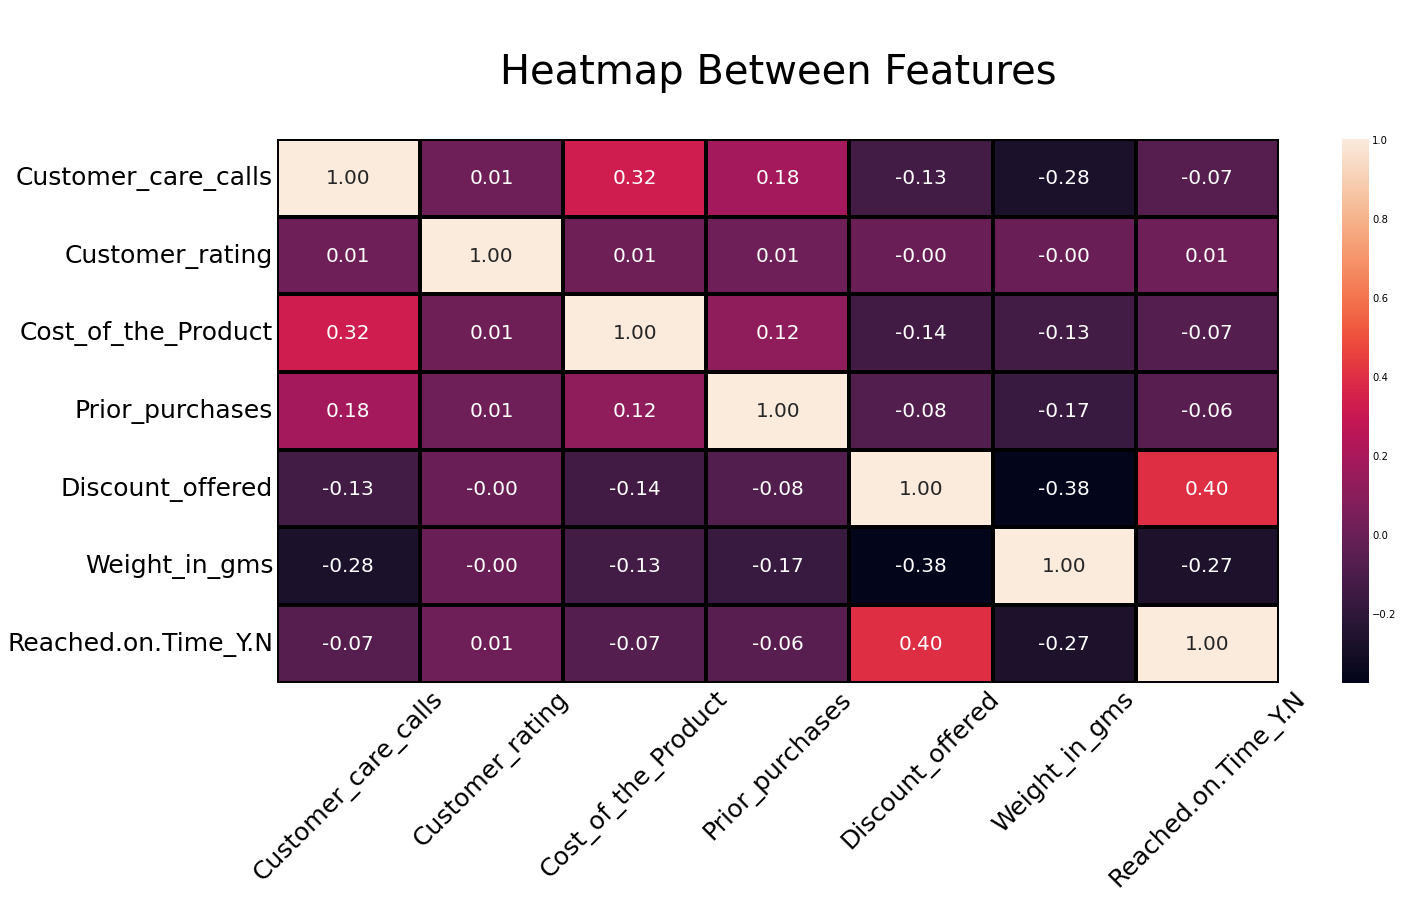

In [324]:
# CHECK THE CORRELATION BETWEEN FEATURES

plt.figure(figsize = (20,10))
hm = sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 20}, linewidth = 4, linecolor = 'black')
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25, rotation = 45)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
plt.title(f'\nHeatmap Between Features\n', fontsize = 40)
plt.show()

Heatmap key points:
1. Discount_offered has positive correlation with Reached.on.Time_Y.N of 40%
2. Discount_offered has negative correlation with Weight_in_gms of -38%
3. Weight_in_gms has negative correlation with Reached.on.Time_Y.N of -27%
4. Customer_care_call has positive correlation with Cost_of_the_product of 32%
5. Customer_care_call has negative correlation with Weight_in_gms of -28%

# Exploratory Data Analysis (EDA)

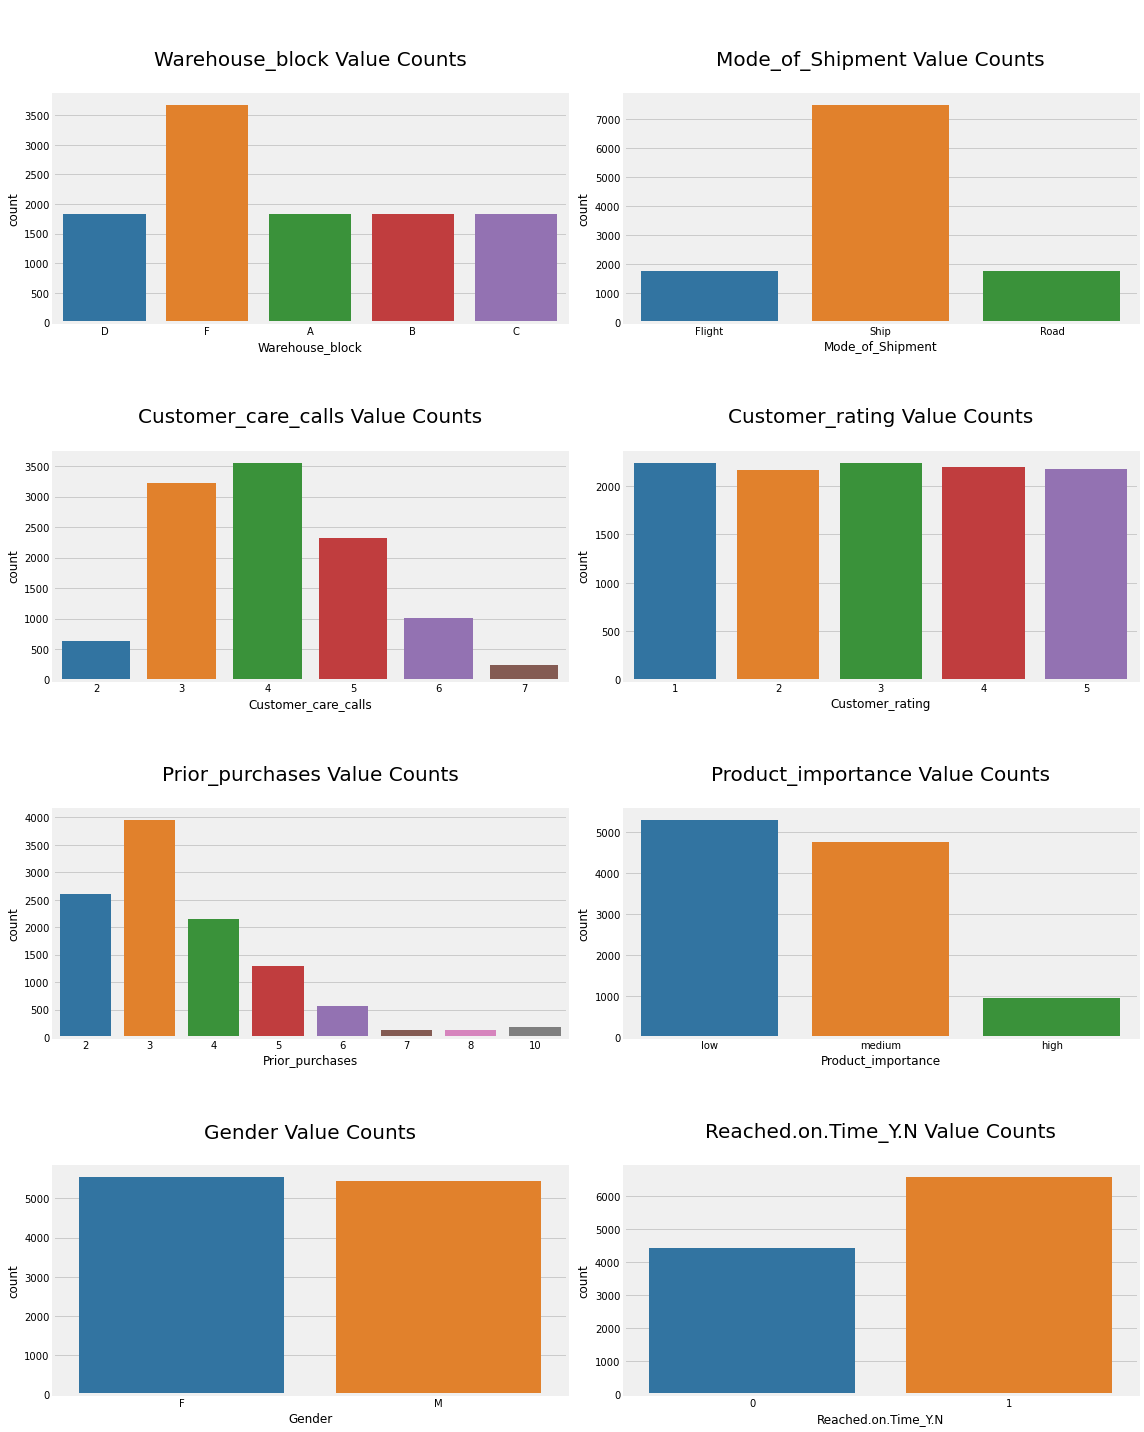

In [325]:
# CREATE LIST OF CATEGORICAL COLUMNS
cols = ['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating'
        ,'Prior_purchases','Product_importance','Gender','Reached.on.Time_Y.N']

plt.figure(figsize = (16,20))
plotnumber = 1

# PLOT THE VALUE COUNT OF CATEGORICAL COLUMNS
for i in range(len(cols)):
    ax = plt.subplot(4,2,plotnumber)
    cp = sns.countplot(x = cols[i], data = df, ax = ax, palette = 'tab10')
    plt.title(f"\n\n{cols[i]} Value Counts\n", fontsize = 20)
    #plt.title(cols[i] + " Value Counts", fontsize = 20)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Exploring relation of categorical columns with reached on time or not

In [326]:
# CREATE LIST OF CATEGORICAL COLUMNS

object_columns = df.select_dtypes(include = ['object'])
#object_columns = df[["Warehouse_block", "Mode_of_Shipment"]]
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


### Warehouse Block

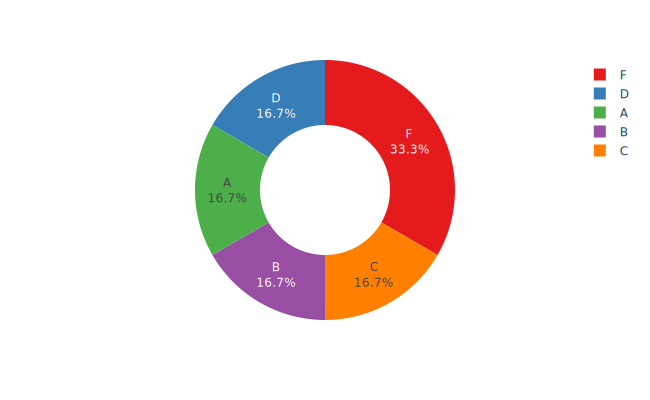

In [327]:
# WAREHOUSE PERCENTAGE IN DATABASE

warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse','value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
            color_discrete_sequence = px.colors.qualitative.Set1, 
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'label+percent')
fig.show("svg")

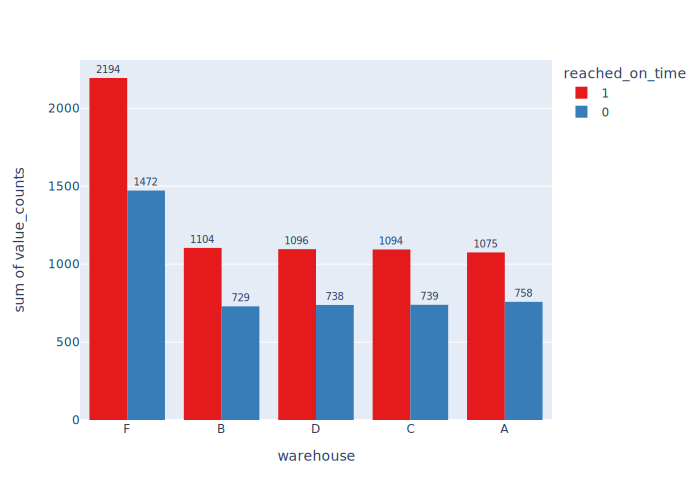

In [328]:
# LOOK AT EACH WAREHOUSE PERFORMANCE ON REACHED ON TIME

warehouse = df[['Warehouse_block','Reached.on.Time_Y.N']].value_counts().reset_index()
warehouse.columns = ['warehouse','reached_on_time','value_counts']

fig = px.histogram(warehouse, x = 'warehouse', y = 'value_counts',
                  color = 'reached_on_time', barmode = 'group', text_auto = True, 
                  color_discrete_sequence = px.colors.qualitative.Set1)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Gender

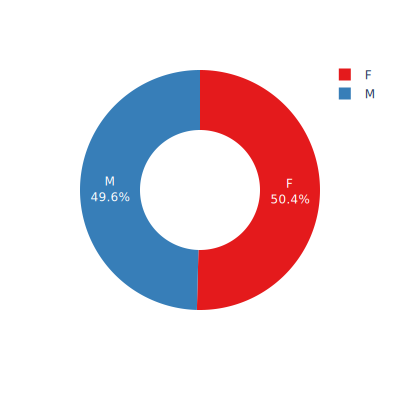

In [329]:
# GENDER PERCENTAGE IN DATABASE

gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['gender', 'value_counts']
fig = px.pie(gender, names = 'gender', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.Set1,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

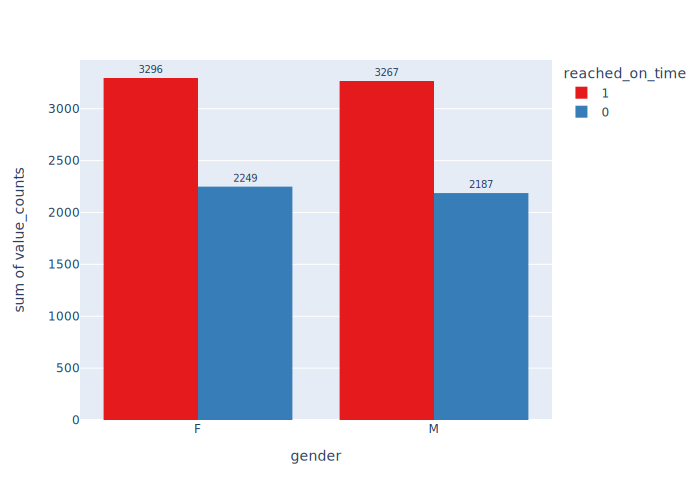

In [330]:
# LOOK AT GENDER PERFORMANCE ON REACHED ON TIME

gender = df[['Gender', 'Reached.on.Time_Y.N']].value_counts().reset_index()
gender.columns = ['gender', 'reached_on_time', 'value_counts']

fig = px.histogram(gender, x = 'gender', y = 'value_counts', 
                   color = 'reached_on_time', barmode = 'group', 
                   text_auto = True, 
                   color_discrete_sequence = px.colors.qualitative.Set1)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Mode Of Shipment

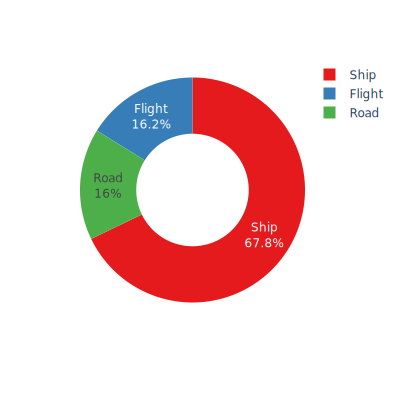

In [331]:
# MODE OF SHIPMENT PERCENTAGE IN DATABASE

mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['mode_of_shipment', 'value_counts']

fig = px.pie(mode, names = 'mode_of_shipment', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.Set1,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

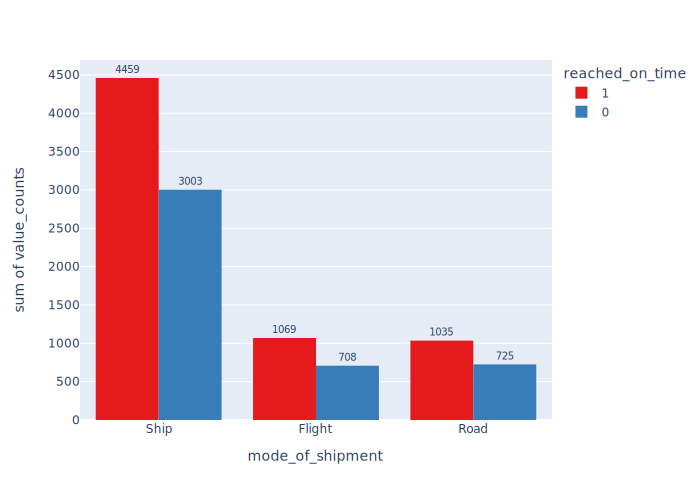

In [332]:
# MODE OF SHIPMENT PERFORMANCE ON REACHED ON TIME

mode = df[['Mode_of_Shipment', 'Reached.on.Time_Y.N']].value_counts().reset_index()
mode.columns = ['mode_of_shipment', 'reached_on_time', 'value_counts']

fig = px.histogram(mode, x = 'mode_of_shipment', y = 'value_counts',
                   color = 'reached_on_time', barmode = 'group', 
                   text_auto = True,
                   color_discrete_sequence = px.colors.qualitative.Set1)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Product Importance

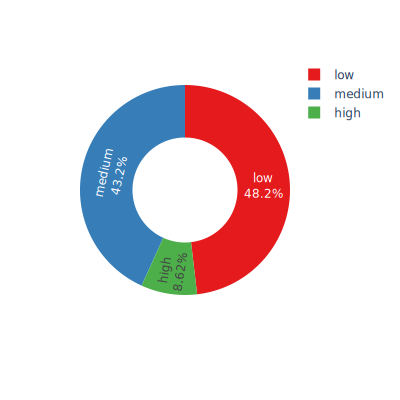

In [333]:
# PRODUCT IMPORTANCE PERCENTAGE IN DATABASE

product = object_columns['Product_importance'].value_counts().reset_index()
product.columns = ['product_importance', 'value_counts']

fig = px.pie(product, names = 'product_importance', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.Set1,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

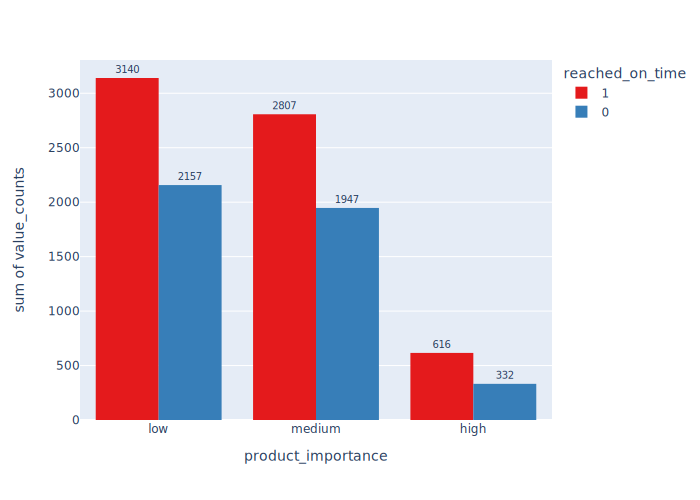

In [334]:
# PRODUCT IMPORTANCE PERFORMANCE ON REACHED ON TIME

product = df[['Product_importance', 'Reached.on.Time_Y.N']].value_counts().reset_index()
product.columns = ['product_importance', 'reached_on_time', 'value_counts']

fig = px.histogram(product, x = 'product_importance', y = 'value_counts',
                  color = 'reached_on_time', barmode = 'group', 
                  text_auto = True, color_discrete_sequence = px.colors.qualitative.Set1)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

## Exploring relation of continous columns with reached on time  

In [335]:
# CREATE LIST OF CONTINUOUS COLUMNS

integer_columns = df.select_dtypes(include = ['int'])
integer_columns.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


### Customer Care Calls

In [336]:
# CONVERT COLUMN TYPE TO CATEGORICAL

calls = integer_columns[['Customer_care_calls', 'Reached.on.Time_Y.N']].value_counts().reset_index()
calls.columns = ['customer_care_calls', 'reached_on_time', 'value_counts']

calls = pd.DataFrame(calls)
calls['customer_care_calls'] = calls.customer_care_calls.astype('category')
calls['reached_on_time'] = calls.reached_on_time.astype('category')
calls.dtypes

customer_care_calls    category
reached_on_time        category
value_counts              int64
dtype: object

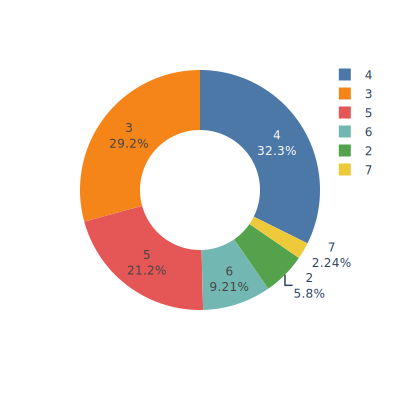

In [337]:
# CUSTOMER CARE CALLS PERCENTAGE IN DATABASE

fig = px.pie(calls, names = 'customer_care_calls', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.T10,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

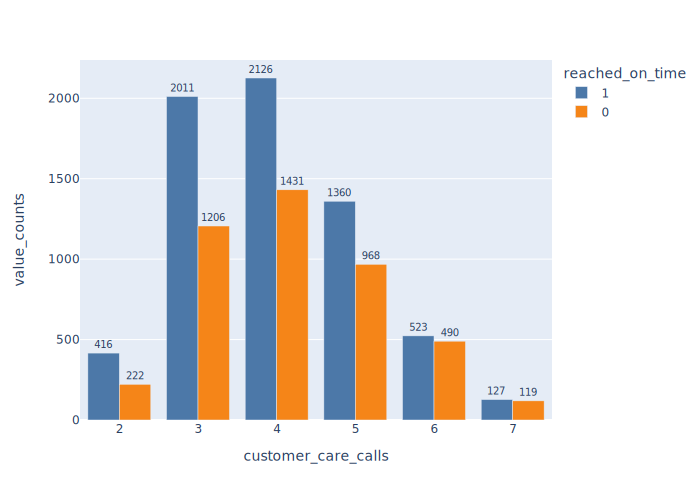

In [338]:
# CUSTOMER CARE CALL PERFORMANCE ON REACHED ON TIME

fig = px.bar(calls, x = 'customer_care_calls', y = 'value_counts',
                   color = 'reached_on_time', 
                   text_auto = True, barmode = 'group',
                   category_orders = {'customer_care_calls': ['2', '3', '4', '5', '6', '7']},
                   color_discrete_sequence = px.colors.qualitative.T10)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Customer Ratings

In [339]:
# CONVERT COLUMN TYPE TO CATEGORICAL

ratings = integer_columns[['Customer_rating', 'Reached.on.Time_Y.N']].value_counts().reset_index()
ratings.columns = ['customer_ratings', 'reached_on_time', 'value_counts']

ratings = pd.DataFrame(ratings)
ratings['customer_ratings'] = ratings.customer_ratings.astype('category')
ratings['reached_on_time'] = ratings.reached_on_time.astype('category')
ratings.dtypes

customer_ratings    category
reached_on_time     category
value_counts           int64
dtype: object

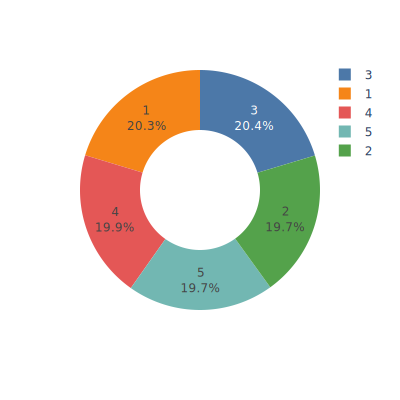

In [340]:
# CUSTOMER RATINGS PERCENTAGE IN DATABASE

fig = px.pie(ratings, names = 'customer_ratings', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.T10,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

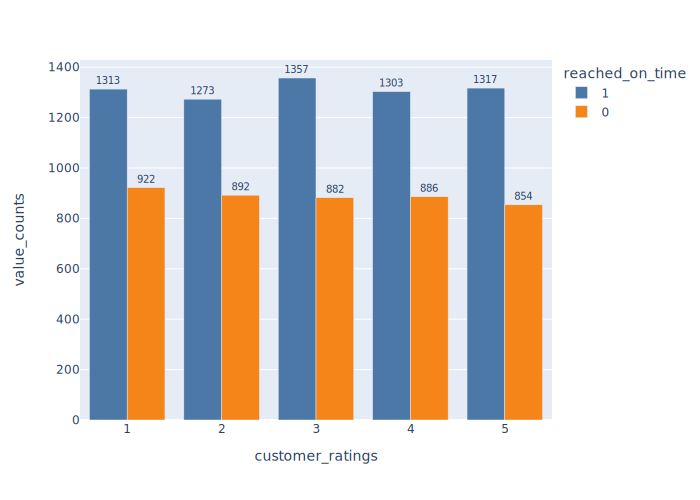

In [341]:
# CUSTOMER RATINGS PERFORMANCE ON REACHED ON TIME

fig = px.bar(ratings, x = 'customer_ratings', y = 'value_counts',
            color = 'reached_on_time', text_auto = True, barmode = 'group',
            category_orders = {'customer_ratings':['1','2','3','4','5']},
            color_discrete_sequence = px.colors.qualitative.T10)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Cost of The Product

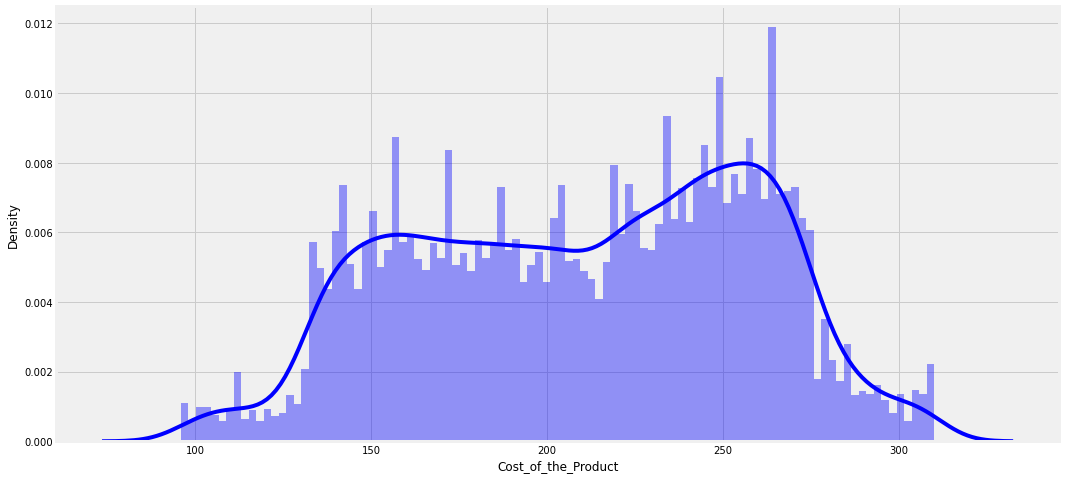

In [342]:
# DISTRIBUTION OF COST OF THE PRODUCT

plt.figure(figsize = (16,8))
ax = sns.distplot(integer_columns['Cost_of_the_Product'], bins = 100,
                 color = 'b')
plt.show()

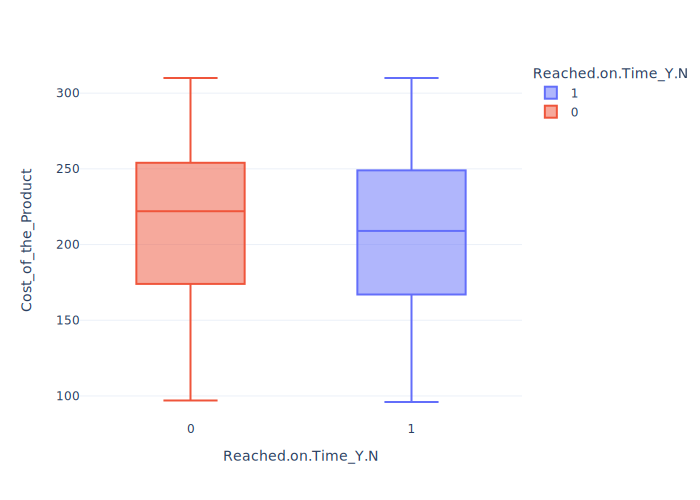

In [343]:
# RELATION BETWEEN COST OF THE PRODUCT AND REACHED ON TIME

fig = px.box(data_frame = integer_columns, x = 'Reached.on.Time_Y.N', 
            y = 'Cost_of_the_Product', color = 'Reached.on.Time_Y.N',
            template = 'plotly_white')
fig.show("svg")

### Prior Purchases

In [344]:
# CONVERT COLUMN TYPE TO CATEGORICAL

purchases = integer_columns[['Prior_purchases', 'Reached.on.Time_Y.N']].value_counts().reset_index()
purchases.columns = ['prior_purchases', 'reached_on_time', 'value_counts']

purchases = pd.DataFrame(purchases)
purchases['prior_purchases'] = purchases.prior_purchases.astype('category')
purchases['reached_on_time'] = purchases.reached_on_time.astype('category')
purchases.dtypes

prior_purchases    category
reached_on_time    category
value_counts          int64
dtype: object

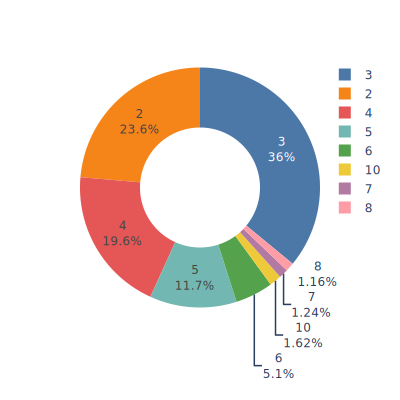

In [345]:
# PRIOR PURCHASES PERCENTAGE IN DATABASE

fig = px.pie(purchases, names = 'prior_purchases', values = 'value_counts',
            color_discrete_sequence = px.colors.qualitative.T10,
            width = 400, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig.show("svg")

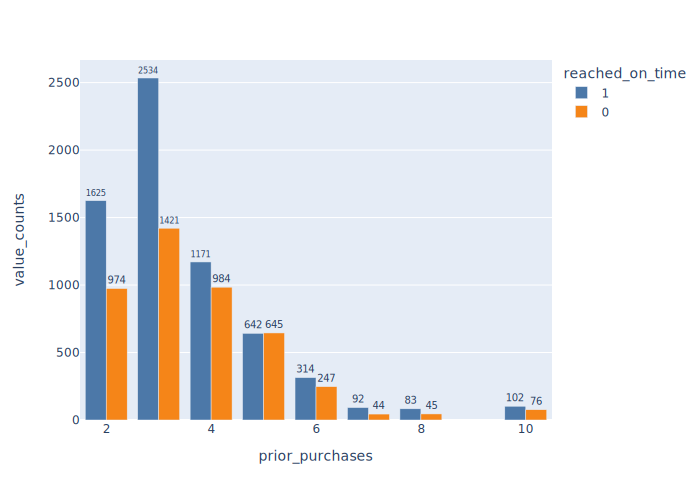

In [346]:
# PRIOR PURCHASES PERFORMANCE ON REACHED ON TIME

fig = px.bar(purchases, x = 'prior_purchases', y = 'value_counts',
            color = 'reached_on_time', text_auto = True, barmode = 'group',
            category_orders = {'prior_purchases':['2','3','4','5','6','7','8','10']},
            color_discrete_sequence = px.colors.qualitative.T10)
fig.update_traces(textfont_size = 10, textangle = 0, textposition = 'outside')
fig.show("svg")

### Discount Offered

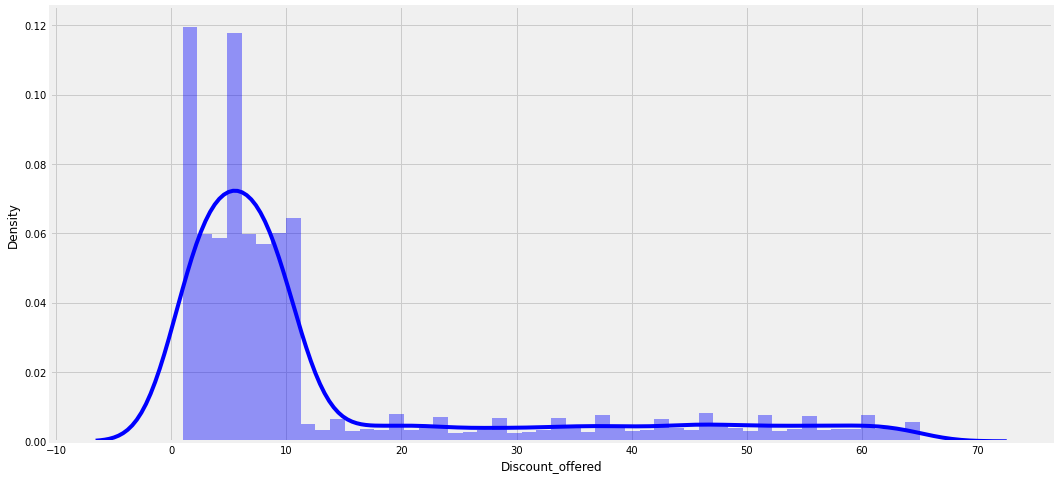

In [347]:
# DISTRIBUTION OF DISCOUNT OFFERED

plt.figure(figsize = (16,8))
ax = sns.distplot(integer_columns['Discount_offered'],
                 color = 'b')
plt.show()

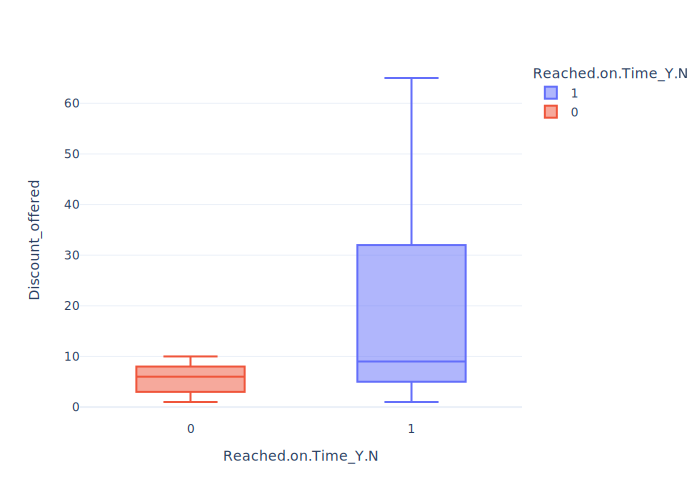

In [348]:
# RELATION BETWEEN DISCOUNT OFFEREND AND REACHED ON TIME

fig = px.box(data_frame = integer_columns, x = 'Reached.on.Time_Y.N', 
            y = 'Discount_offered', color = 'Reached.on.Time_Y.N',
            template = 'plotly_white')
fig.show("svg")

### Weight in Grams

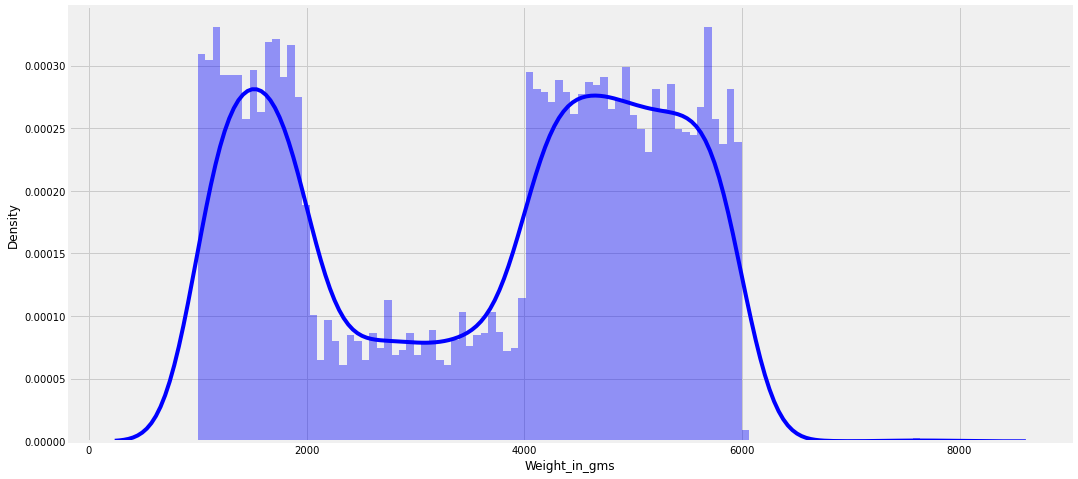

In [349]:
# DISTRIBUTION OF WEIGHT IN GRAMS

plt.figure(figsize = (16,8))
ax = sns.distplot(integer_columns['Weight_in_gms'], bins = 100,
                 color = 'b')
plt.show()

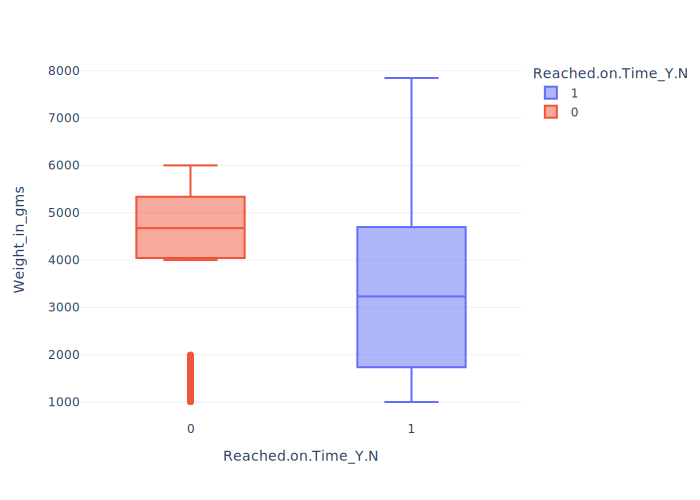

In [350]:
# RELATION BETWEEN WEIGH IN GRAMS AND REACHED ON TIME

fig = px.box(data_frame = integer_columns, x = 'Reached.on.Time_Y.N',
             y = 'Weight_in_gms', 
             color = 'Reached.on.Time_Y.N', template = 'plotly_white')
fig.show("svg")

### Which Warehouse Contains the Most Weights?

In [351]:
# GROUP OF WAREHOUSE

warehouse_weight = df.groupby(['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
warehouse_weight

,Warehouse_block,Weight_in_gms
0,A,6627118
1,B,6664240
2,C,6674560
3,D,6655305
4,F,13349327


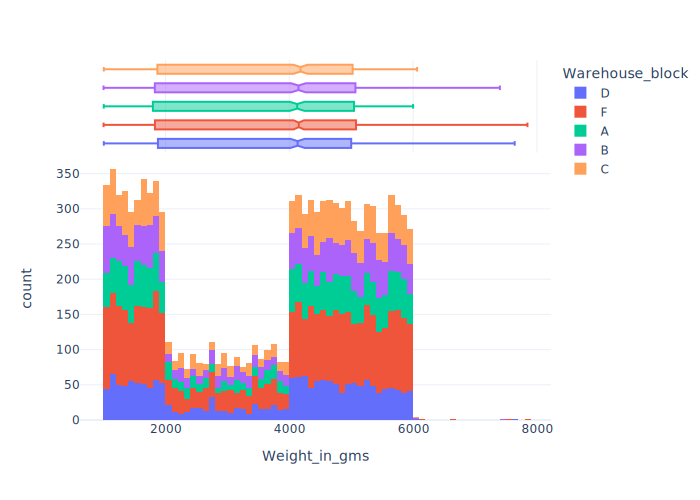

In [352]:
# VISUALIZATION

fig = px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, 
            color = 'Warehouse_block',
            marginal = 'box', template = 'plotly_white')
fig.show("svg")

### Which Mode of Shipment Carries the Most Weights?

In [353]:
# GROUP OF SHIPMENT MODE

shipment_weight = df.groupby(['Mode_of_Shipment'])['Weight_in_gms'].sum().reset_index()
shipment_weight

,Mode_of_Shipment,Weight_in_gms
0,Flight,6449405
1,Road,6423209
2,Ship,27097936


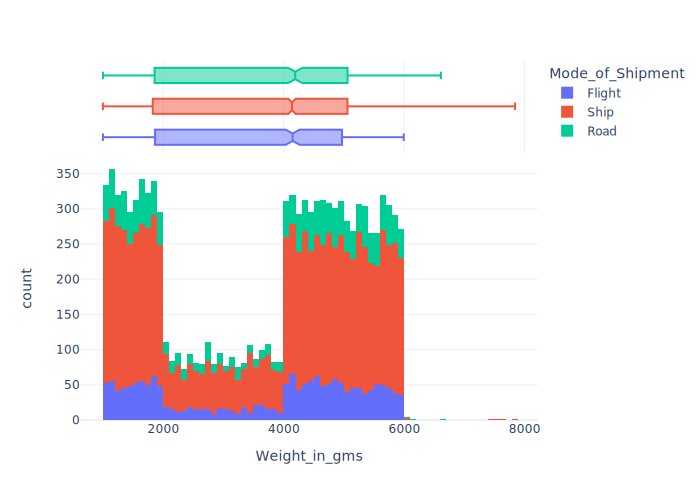

In [354]:
# VISUALIZATION

fig = px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100,
            color = 'Mode_of_Shipment', marginal = 'box',
            template = 'plotly_white')
fig.show("svg")

Ship is carrying the most varied weight of products

### Which Warehouse Has the Heightest Cost of Products

In [355]:
# GROUP OF WAREHOUSE

warehouse_cost = df.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()
warehouse_cost

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


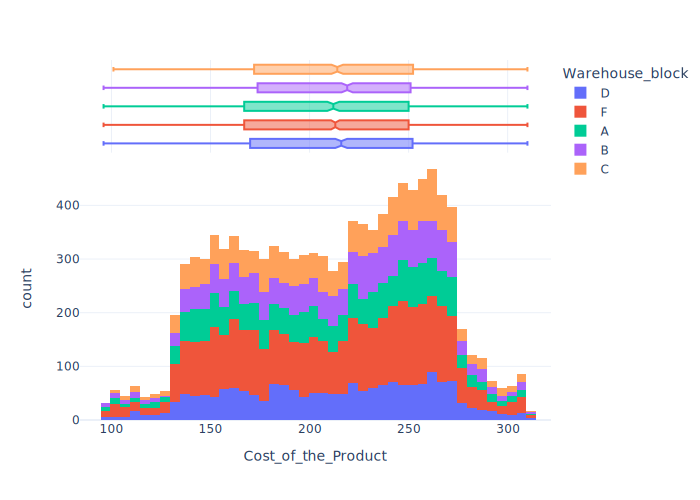

In [356]:
# VISUALIZATION

fig = px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100,
            color = 'Warehouse_block', marginal = 'box',
            template = 'plotly_white')
fig.show("svg")

Warehouse F has the highest cost of product

### Which Mode of Shipment has the Highest Cost of Products

In [357]:
# GROUP OF SHIPMENT MODE

shipment_cost = df.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()
shipment_cost

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


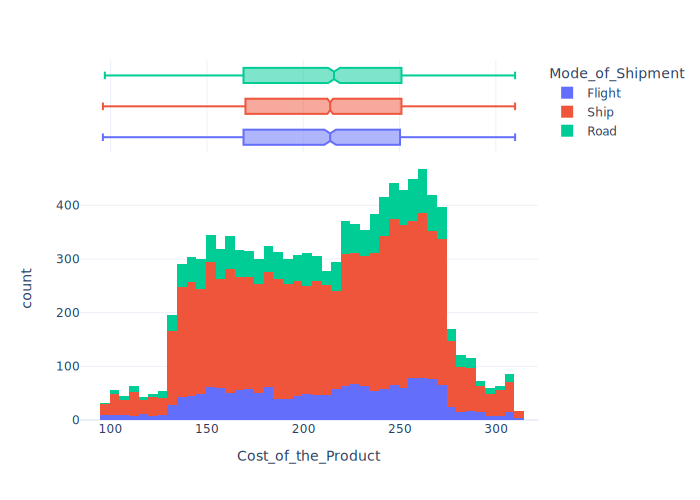

In [358]:
# VISUALIZATION

fig = px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100,
            color = 'Mode_of_Shipment', marginal = 'box',
            template = 'plotly_white')
fig.show("svg")

Ship has the highest cost of the product

### Does Customer Calls Effect Ratings

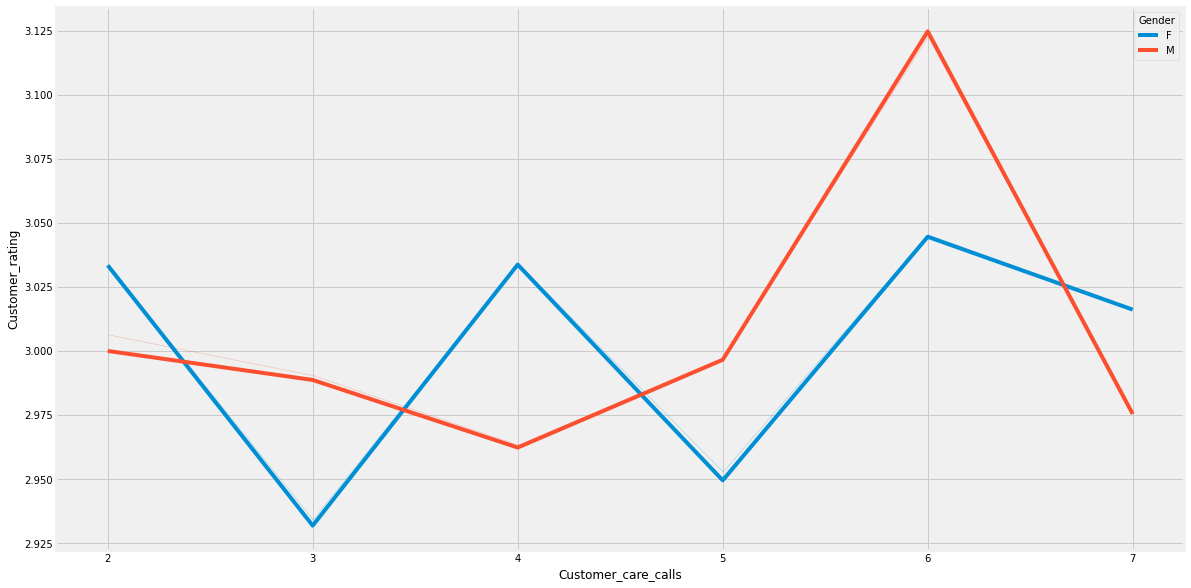

In [359]:
# CHECK THE RELATION BETWEEN CUSTOMER CALLS, RATINGS, AND GENDER

plt.figure(figsize=(18,10))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender',
            data = df, ci = 0)
plt.show()

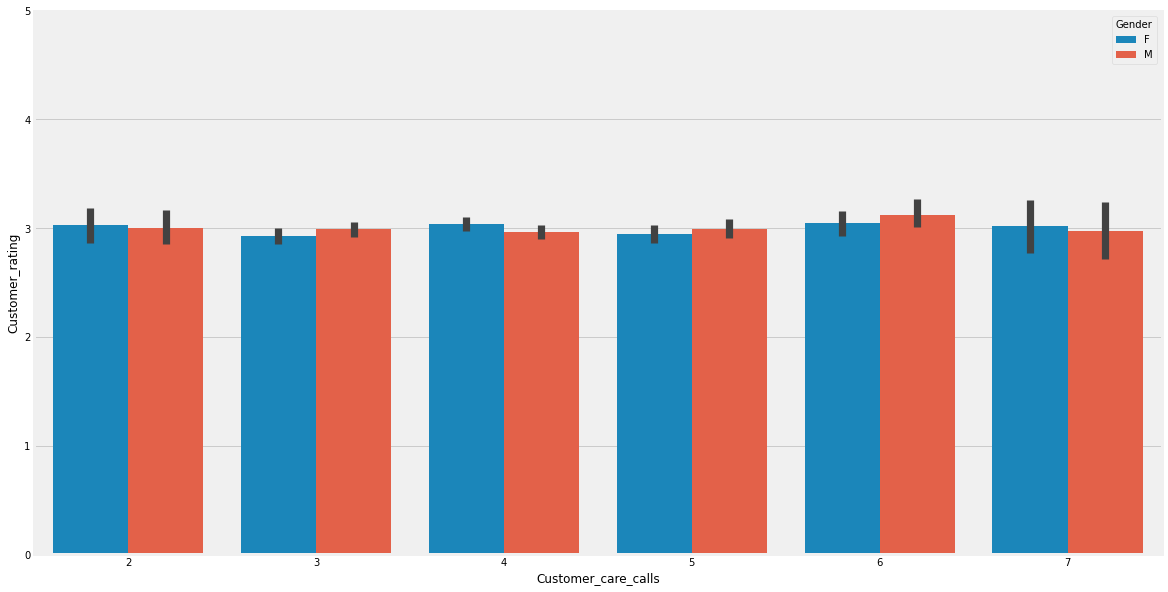

In [360]:
# CHECK THE RELATION BETWEEN CUSTOMER CALLS, RATINGS, AND GENDER

plt.figure(figsize = (18,10))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender',
            data = df)
plt.ylim(0,5)
plt.show()

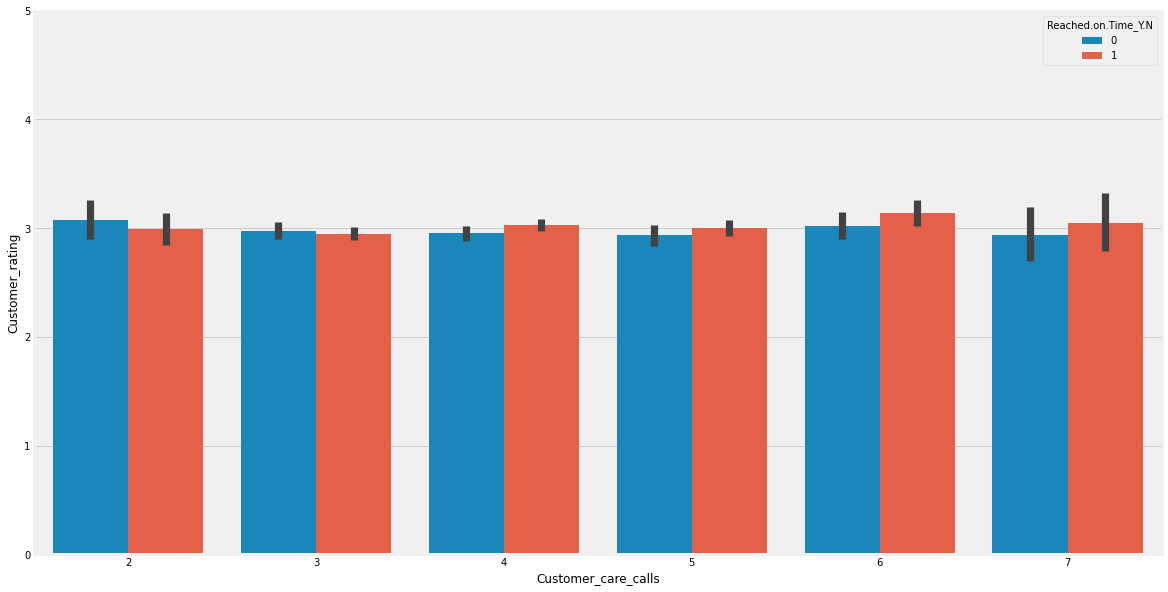

In [361]:
# CHECK THE RELATION BETWEEN CUSTOMER CALLS, RATINGS, AND REACH ON TIME

plt.figure(figsize = (18,10))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N',
            data = df)
plt.ylim(0,5)
plt.show()

Customer calls were more when the product doesn't reach on time

### Does Customer Calls Effect Product Importance

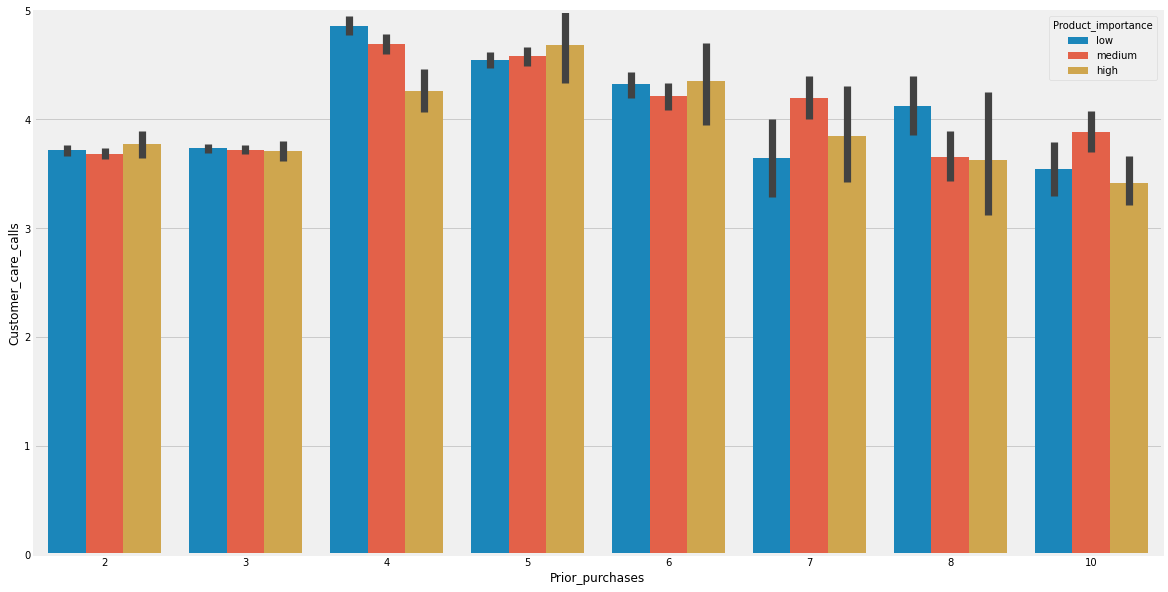

In [362]:
# CHECK THE RELATION BETWEEN PRODUCT IMPORTANCE, CUSTOMER CALLS, AND PRIOR PURCHASES

plt.figure(figsize = (18,10))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', hue = 'Product_importance',
            data = df)
plt.ylim(0,5)
plt.show()

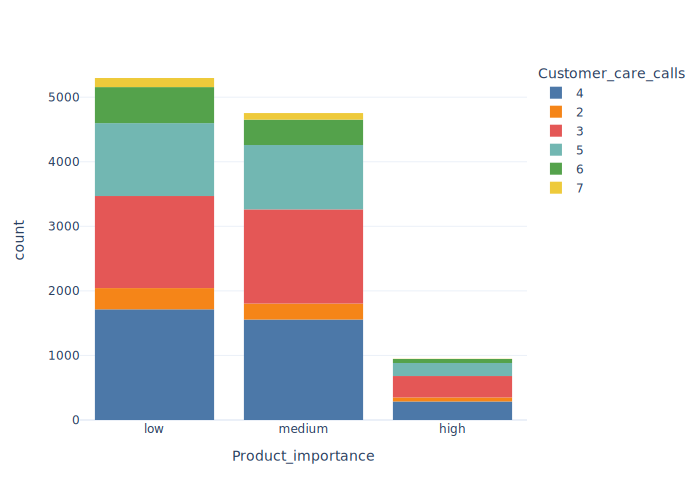

In [363]:
# CHECK THE RELATION BETWEEN CUSTOMER CALLS AND PRODUCT IMPORTANCE

fig = px.histogram(data_frame = df, x = 'Product_importance',
            color = 'Customer_care_calls',
            color_discrete_sequence = px.colors.qualitative.T10,
            template = 'plotly_white')
fig.show("svg")

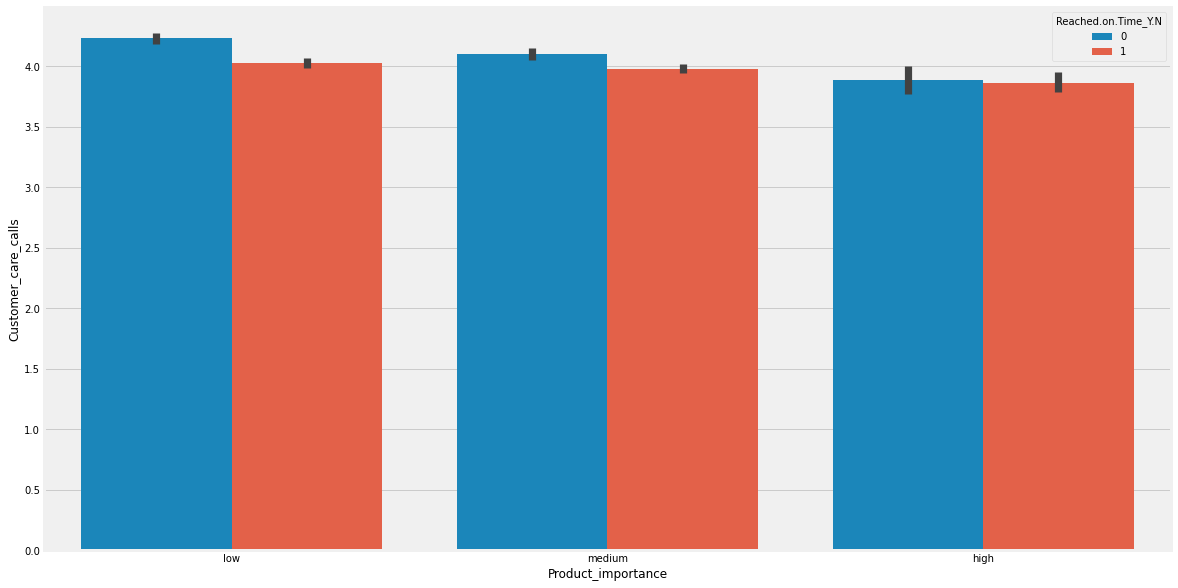

In [364]:
# CHECK THE RELATION BETWEEN PRODUCT IMPORTANCE, CUSTOMER CALLS, REACHED ON TIME

plt.figure(figsize = (18,10))
sns.barplot(x = 'Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N',
           data = df)
plt.show()

1. Customer care calls were more when product importance is low
2. When product importance is low or medium, then more of the product were reached on time. When product importance is high, then product reached on time or not are equal

### Does Discount Offered Effect Product Importance

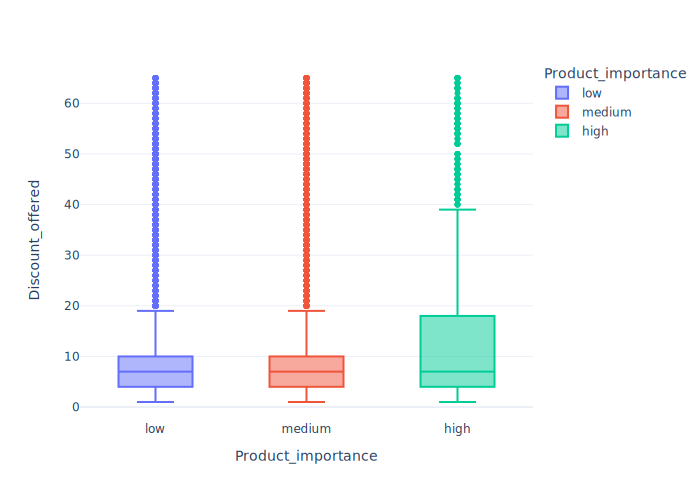

In [365]:
# CHECK RELATION BETWEEN DISCOUNT OFFERED AND PRODUCT IMPORTANCE

fig = px.box(data_frame = df, x = 'Product_importance', y = 'Discount_offered', 
      color = 'Product_importance', template = 'plotly_white')
fig.show("svg")

High importance product has the higher discount offered

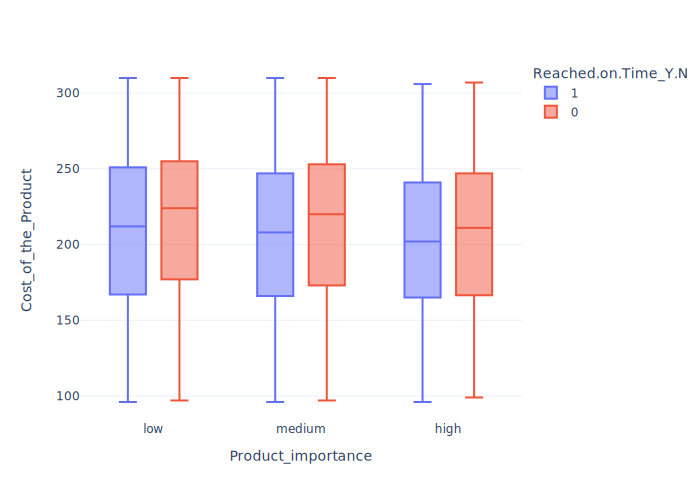

In [366]:
# CHECK RELATION BETWEEN COST OF PORDUCT, PRODUCT IMPORTANCE, AND REACHED ON TIME

fig = px.box(data_frame = df, x = 'Product_importance', y = 'Cost_of_the_Product',
      color = 'Reached.on.Time_Y.N', template = 'plotly_white')
fig.show("svg")

Product that reached on time has the higher cost of product than not reached on time

### Who Gets the Higher Discount 

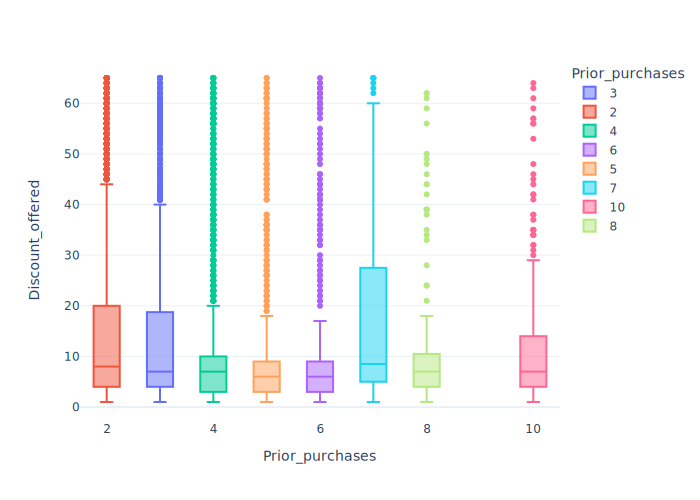

In [367]:
# CHECK RELATION BETWEEN PRIOR PURCHASES AND DISCOUNT OFFERED

fig = px.box(data_frame = df, x = 'Prior_purchases', y = 'Discount_offered', 
      color = 'Prior_purchases', template = 'plotly_white')
fig.show("svg")

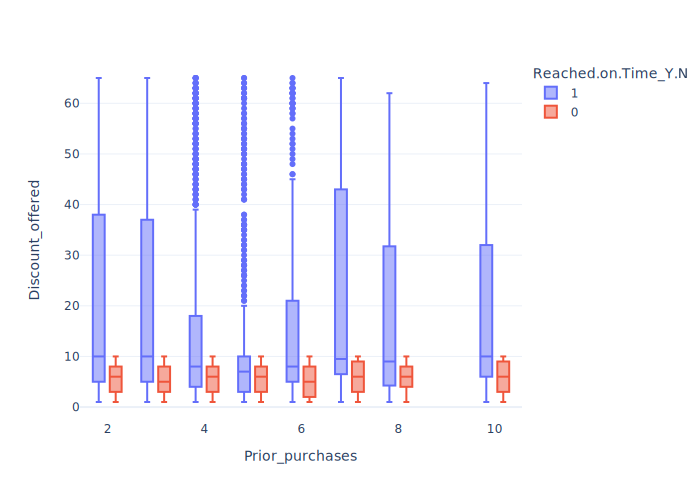

In [368]:
# CHECK RELATION BETWEEN PRIOR PURCHASES, DISCOUNT OFFERED, AND REACH ON TIME

fig = px.box(data_frame = df, x = 'Prior_purchases', y = 'Discount_offered', 
      color = 'Reached.on.Time_Y.N', template = 'plotly_white')
fig.show("svg")

Newly customers (2-3) and old customers (7-10) were offered higher discounts

### Does Weight of Product Effect Customer Calls

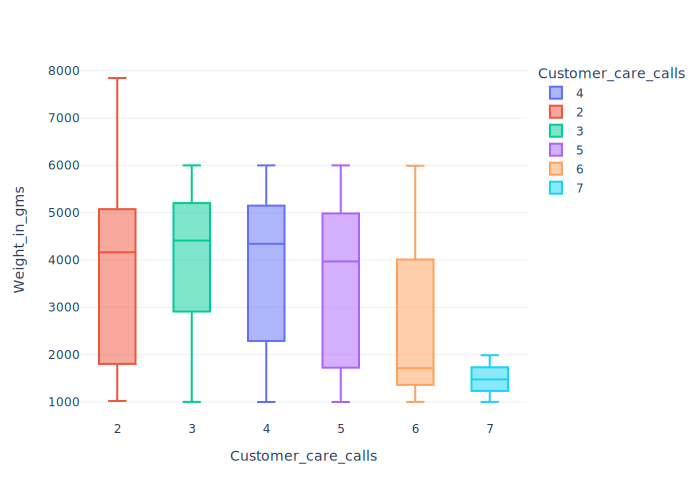

In [369]:
# CHECK RELATION BETWEEN WEIGHT AND CUSTOMER CALLS

fig = px.box(data_frame = df, x = 'Customer_care_calls', y = 'Weight_in_gms',
      color = 'Customer_care_calls', template = 'plotly_white')
fig.show("svg")

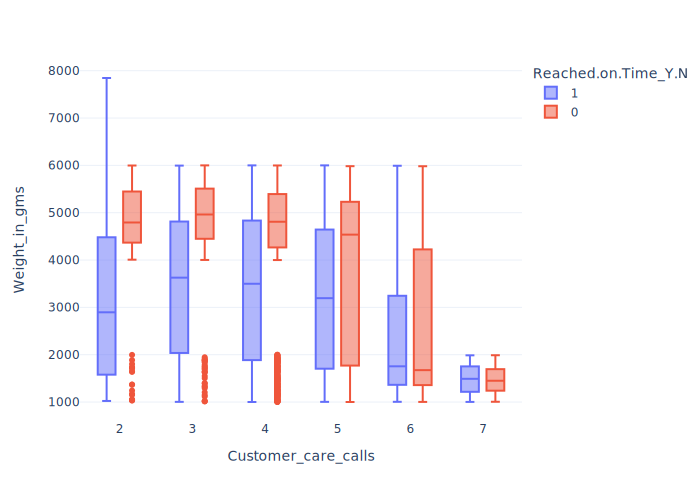

In [370]:
# CHECK RELATION BETWEEN WEIGHT, CUSTOMER CALLS, AND REACH ON TIME

fig = px.box(data_frame = df, x = 'Customer_care_calls', y = 'Weight_in_gms',
      color = 'Reached.on.Time_Y.N', template = 'plotly_white')
fig.show("svg")

Customer calls and weight of product have negative correlation

### Does Cost of Product Effect Customer Calls

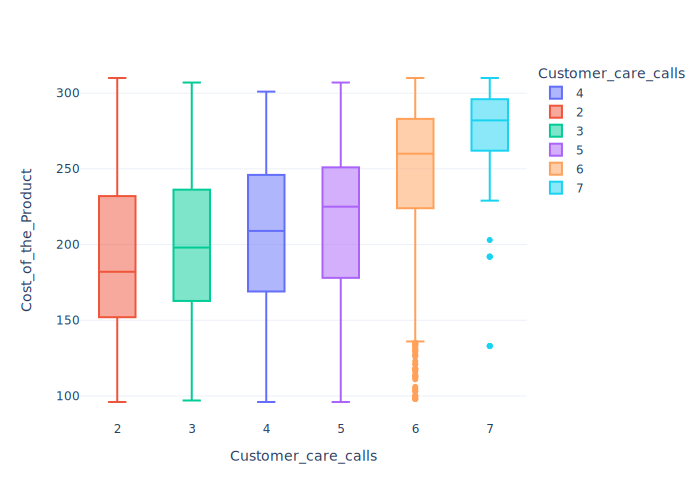

In [371]:
# CHECK THE RELATION BETWEEN COST OF PRODUCT AND CUSTOMER CALLS

fig = px.box(data_frame = df, x = 'Customer_care_calls', y = 'Cost_of_the_Product',
      color = 'Customer_care_calls', template = 'plotly_white')
fig.show("svg")

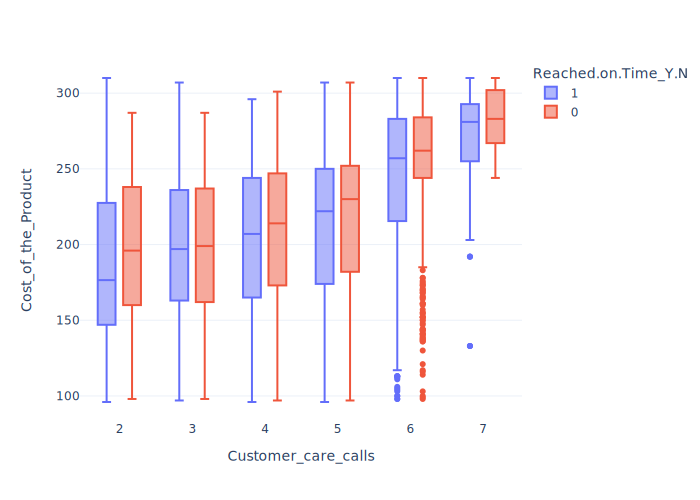

In [372]:
# CHECK THE RELATION BETWEEN COST OF PRODUCT, CUSTOMER CALLS, AND REACH ON TIME

fig = px.box(data_frame = df, x = 'Customer_care_calls', y = 'Cost_of_the_Product',
      color = 'Reached.on.Time_Y.N', template = 'plotly_white')
fig.show("svg")

Customer calls were more when cost of the product is high

### Does Cost of Product Effect Discount Offered

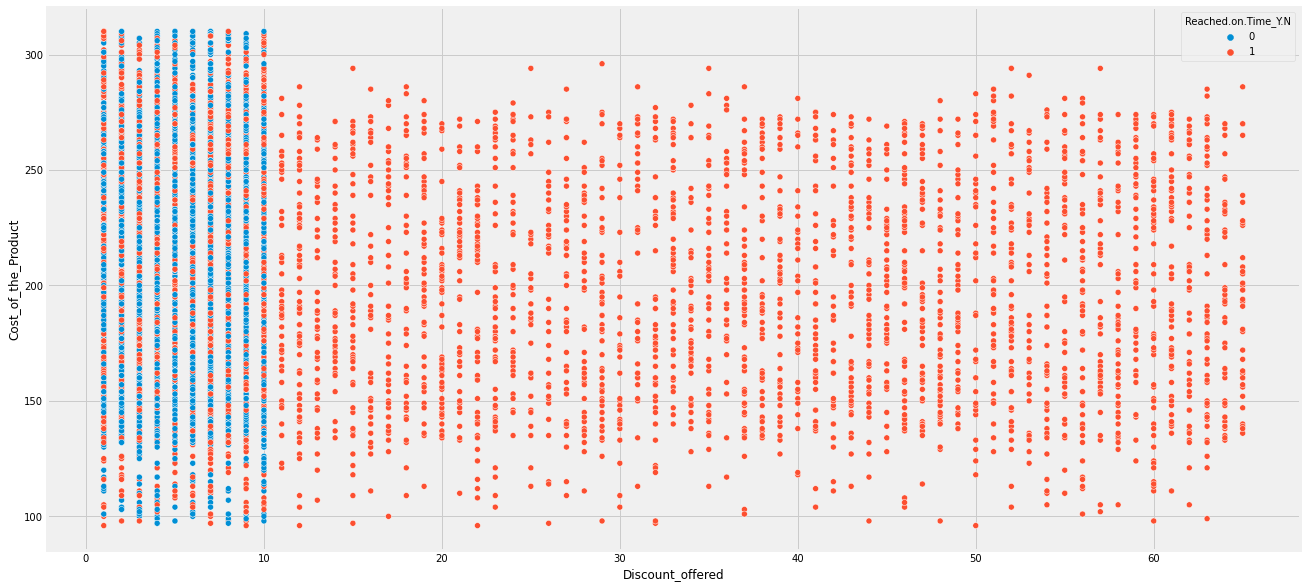

In [373]:
# CHECK THE RELATION BETWEEN DISCOUNT OFFERED, COST OF PRODUCT, REACH ON TIME

plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Discount_offered', y = 'Cost_of_the_Product',
               data = df, hue = 'Reached.on.Time_Y.N')
plt.show()

Product that reached on time has low discount offered